In [1]:
import sys
import os
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.wcs import WCS
sys.path.append(os.path.abspath(os.path.join('..')))
os.chdir('..')
from data.DataObject import DataObject
from data.Region import Region

### Instantiate classes

In [2]:
do = DataObject()
rg = Region()

In [3]:
atomic_data_hdu = do.get_atomic_map_hdu()
atomic_data_wcs = do.get_atomic_map_wcs()

co_data_hdu = do.get_co_map_hdu()
co_data_wcs = do.get_co_map_wcs()

#### Conversion factor

In [4]:
conv = (1.82*10**18 * math.cos(55.1*3.14 / 180)) # Km s^-1 to cm^-2

converted_atomic_hdu = conv * atomic_data_hdu.data

#### Stars inside ACA region

In [5]:
rsgs_inside_aca_region = rg.star_coords_inside_aca_region(atomic_data_wcs, 'RSGs')
wrs_inside_aca_region = rg.star_coords_inside_aca_region(atomic_data_wcs, 'WRs')
snrs_inside_aca_region = rg.star_coords_inside_aca_region(atomic_data_wcs, 'SNRs')

region = rg.draw_sky_region(atomic_data_wcs)
atomic_gas_in_region = rg.atomic_gas_in_region() * conv

C:\Users\jerwa\AppData\Local\Temp\ipykernel_18628\2245525325.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(['0','10','20','30', '40', '50'])


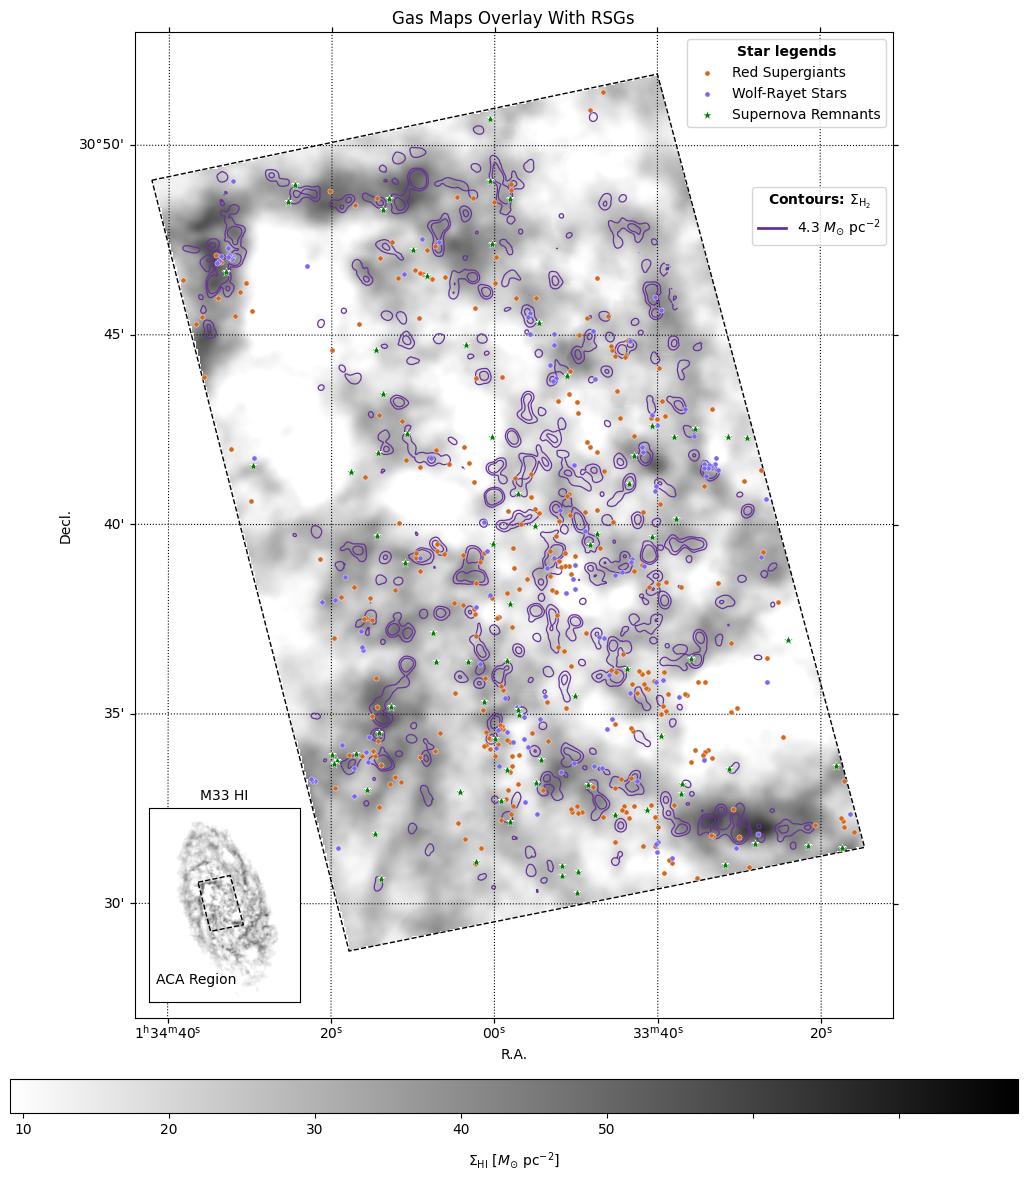

In [11]:
# Initialize figure and axis
fig = plt.figure(figsize=(13, 16))
ax = plt.subplot(projection=atomic_data_wcs, label='overlays')

# Display the image
plt.imshow(atomic_gas_in_region, cmap='gray_r', vmin=175 * conv, vmax=1500 * conv)

# Configure colorbar
cbar = plt.colorbar(orientation='horizontal', pad=0.05, aspect=30)
cbar.ax.set_xticklabels(['0','10','20','30', '40', '50'])
cbar.set_label("$\Sigma_{\mathrm{HI}} \ [M_{\odot} \ \mathrm{pc}^{-2}]$", rotation=0, labelpad=10)

# Title and grid
plt.title('Gas Maps Overlay With RSGs')
ax.coords.grid(True, color='black', ls='dotted')

# Axis labels
ax.coords[0].set_axislabel('R.A.')
ax.coords[1].set_axislabel('Decl.')

# Scatter plot for stars with label
rsg_scatter = ax.scatter(
    rsgs_inside_aca_region.ra.deg,
    rsgs_inside_aca_region.dec.deg,
    transform=ax.get_transform('fk5'),
    s=14,
    linewidth=0.3,
    edgecolor='white',
    facecolor='chocolate',
    label='Red Supergiants',
    zorder=3,
)
wr_scatter = ax.scatter(
    wrs_inside_aca_region.ra.deg,
    wrs_inside_aca_region.dec.deg,
    transform=ax.get_transform('fk5'),
    s=14,
    linewidth=0.3,
    edgecolor='white',
    facecolor='mediumslateblue',
    label='Wolf-Rayet Stars',
    zorder=3,
)
snr_scatter = ax.scatter(
    snrs_inside_aca_region.ra.deg,
    snrs_inside_aca_region.dec.deg,
    transform=ax.get_transform('fk5'),
    marker='*',
    s=45,
    linewidth=0.3,
    edgecolor='white',
    facecolor='green',
    label='Supernova Remnants',
    zorder=3,
)

# Plot atomic gas inside region (assuming this plot also has a label)
region.plot(label='Atomic Gas', linestyle='--')

# Add the legend for the scatter and atomic gas plot
plt.legend(loc='best', frameon=True)

# Set axis limits
ax.set_xlim(400, 800)
ax.set_ylim(550, 1070)

# Contour plot without label
contour = ax.contour(
    rg.get_co_map_data(),
    transform=ax.get_transform(WCS(rg.get_co_map_header(), naxis=2)),
    levels = [900,3000,],
    colors='rebeccapurple',
    linewidths=0.9
)

# Add a Line2D object to the legend to represent the contour
contour_legend = Line2D([0], [0], color='rebeccapurple', lw=2, label='4.3 $M_{\odot} \ \mathrm{pc}^{-2}$')
scatter_legend = ax.legend(handles=[rsg_scatter, wr_scatter, snr_scatter], loc='upper right', frameon=True, title='Star legends',
                            title_fontproperties={'weight': 'bold'})
ax.add_artist(scatter_legend)
ax.legend(handles=[(contour_legend)], loc='upper right', frameon=True, bbox_to_anchor=(1.0, 0.85),
        title='Contours: $\Sigma_{\mathrm{H_2}}$', title_fontproperties={'weight': 'bold'})

# Create inset plot in the bottom left corner
inset_ax = inset_axes(ax, width="20%", height="20%", loc='lower left', borderpad=1,
                    )

# Display the atomic gas image in the inset plot
inset_ax.imshow(converted_atomic_hdu, cmap='gray_r', vmin=175 * conv, vmax=1500 * conv, origin='lower')

# Plot the region on the inset plot
region.plot(ax=inset_ax, linestyle='--')

# Add text to the inset plot
inset_ax.text(0.05, 0.15, 'ACA Region', transform=inset_ax.transAxes,
            fontsize=10, va='top', ha='left')

# Configure inset axis
inset_ax.set_xticks([])
inset_ax.set_yticks([])
inset_ax.set_title("M33 HI", fontsize=10)

# Show plot
plt.show()
